<a href="https://colab.research.google.com/github/OlatundeEso/Resume/blob/main/SENTIMENT_ANALYSIS_WITH_LSTM_09092013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Essential Libraries and Functions
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPool1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split


In [ ]:
my_data = pd.read_csv('/content/imdb_dataset.csv')

In [ ]:
my_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
my_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
my_data.shape

(50000, 2)

In [ ]:
my_data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [ ]:
my_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
my_data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
my_data.isnull().values.any()

False

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

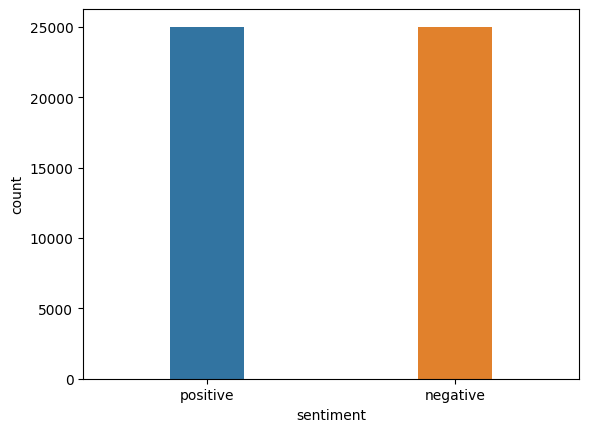

In [ ]:
sns.countplot(x = 'sentiment', data = my_data, width = 0.3)
plt.show()

In [ ]:
my_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
my_data['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
  ''' Removes HTML tags: replaces anything between opening and closeing <> with empty spaces'''
  return TAG_RE.sub('', text)

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(sen):
  '''Cleans text data up, leaving only 2 or more char long non-stopwords composed of A-Z & a-z only in lowercase'''
  sentence  = sen.lower()
  # Remove html tags
  sentence = remove_tags(sentence)
  # Remove punctuations and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)
  # Remove single characters
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
  #Remove multiple spaces
  sentence = re.sub(r'\s+', ' ', sentence)
  # Remove stopwords
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) +r')\b\s*')
  # we could also have written the code above as given below:
  # sentence = re.sub(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*', '', text)
  sentence = pattern.sub('', sentence)
  return sentence
# Calling preprocessing_text function on the movie reviews
X = []
sentences = list(my_data['review'])
for sen in sentences:
  X.append(preprocess_text(sen))
#Sample cleaned up movie review
X[2]


'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [ ]:
my_data['review'][2] # This was it before the cleaning

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
# As we shall use Word Embeddings, stemming and lemmatization is not performed as a pre-processing step
# Converting sentiment labels to 0 and 1
y = my_data['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
# The above means that apply the anonymous lambda function given by the expression before the comma
# taking each element in y as the argument (input) to the function. Iterate through each element of y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# The train test will be used to train our deep learning models
# while the test set will be used to evaluate how well our model will perform

Preparing the Embedding Layer

Now the next thing we would do is to write the script for our Embedding layer. The Embedding layer converts our textual data into numeric form. It MUST be used as the FIRST layer in the deep learning model in keras therefore.

In [ ]:
# The Embedding layer expects the words to be in numeric form
# We would use Tokenizer function from keras.preprocessing.text library
# The method 'fit_on_texts' would train the tokenizer
# Eventually, the text_to_sequence method would convert the sentences to their numerical form
my_word_tokenizer = Tokenizer()
my_word_tokenizer.fit_on_texts(X_train)
X_train = my_word_tokenizer.texts_to_sequences(X_train)
X_test = my_word_tokenizer.texts_to_sequences(X_test)

In [ ]:
my_word_index_dict = my_word_tokenizer.word_index

In [ ]:
len(my_word_index_dict)

92393

In [ ]:
vocab_length = len(my_word_index_dict) + 1

In [ ]:
vocab_length

92394

In [ ]:
# Padding all reviews to fixed length of 100
maxlength = 100
X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlength)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlength)

Now it is time for us to load the Glove word embeddings and create an Embedding dictionary

In [ ]:
from numpy import asarray
from numpy import zeros

In [ ]:
embeddings_dictionary = dict()

In [ ]:
glove_file = open('/content/glove.6B.100d.txt', encoding = "utf8")

for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:], dtype = 'float32')
  embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
from nltk.corpus.reader.senseval import word_tokenize
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus
hits = 0
misses = 0
embedding_matrix = zeros((vocab_length, 100))
for word, index in my_word_tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector
    hits += 1
  else:
    misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(f"Total words found: {hits}, Total words not found: {misses}, Total number of words:", hits + misses)
print(f"Percentage of Success on GloVe is %:", (hits/(hits+misses))*100 )
embedding_matrix.shape

Converted 67960 words (24433 misses)
Total words found: 67960, Total words not found: 24433, Total number of words: 92393
Percentage of Success on GloVe is %: 73.55535592523243


(92394, 100)

Solving the Problem with a Simple Neural Network

In [ ]:
#Neural Network Architecture
snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlength, trainable = False)
snn_model.add(embedding_layer)
snn_model.add(Flatten())
snn_model.add(Dense(1, activation = 'sigmoid'))

#Compiling the model
snn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9239400   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9249401 (35.28 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________
None


In [ ]:
# Model Training
snn_model_history = snn_model.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
250/250 [==============================] - 6s 4ms/step - loss: 0.5593 - acc: 0.7123 - val_loss: 0.5439 - val_acc: 0.7262
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4509 - acc: 0.7927 - val_loss: 0.5005 - val_acc: 0.7604
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4113 - acc: 0.8170 - val_loss: 0.5045 - val_acc: 0.7619
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3908 - acc: 0.8286 - val_loss: 0.5158 - val_acc: 0.7579
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3780 - acc: 0.8341 - val_loss: 0.5290 - val_acc: 0.7534
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3639 - acc: 0.8430 - val_loss: 0.5325 - val_acc: 0.7540
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3562 - acc: 0.8463 - val_loss: 0.5720 - val_acc: 0.7481
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
# Prediction on the Test Set
score = snn_model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.6111 - acc: 0.7403


In [ ]:
# Model Performance
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6110608577728271
Test Accuracy: 0.7402999997138977


Let us Plot a Graph/Chart Showing the Performance of the Model

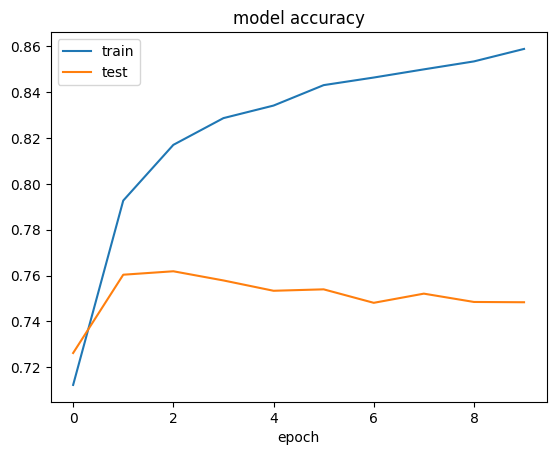

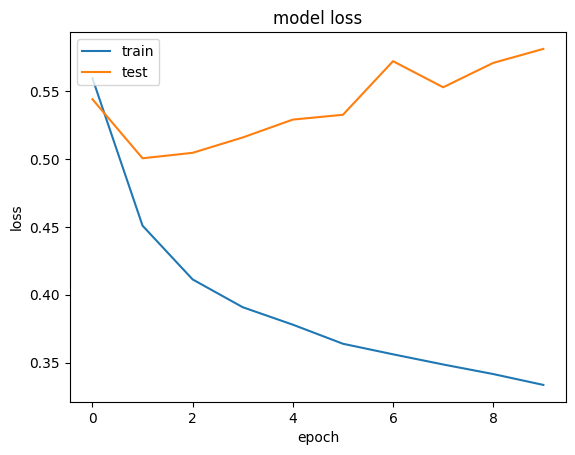

In [ ]:
import matplotlib.pyplot as plt
plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Let Us Train a Convolutional Neural Network and See How it Will Perform

In [ ]:
from keras.layers import Conv1D

In [ ]:
# Neural Network Architecture
cnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlength, trainable = False)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128, 5, activation = 'relu'))
cnn_model.add(GlobalMaxPool1D())
cnn_model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
# Model Compiling
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9303657 (35.49 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________
None


In [ ]:
# Model Training

In [ ]:
cnn_model_history = cnn_model.fit(X_train, y_train, batch_size = 128, epochs =10, verbose = 1, validation_split = 0.2)

Epoch 1/10
250/250 [==============================] - 8s 5ms/step - loss: 0.4736 - acc: 0.7701 - val_loss: 0.3919 - val_acc: 0.8246
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3409 - acc: 0.8530 - val_loss: 0.3686 - val_acc: 0.8336
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2849 - acc: 0.8849 - val_loss: 0.3364 - val_acc: 0.8515
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2397 - acc: 0.9116 - val_loss: 0.3326 - val_acc: 0.8537
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1999 - acc: 0.9317 - val_loss: 0.3314 - val_acc: 0.8541
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.1651 - acc: 0.9503 - val_loss: 0.3378 - val_acc: 0.8530
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.1349 - acc: 0.9647 - val_loss: 0.3470 - val_acc: 0.8525
Epoch 8/10
250/250 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
# Prediction on Test Set
score2 = cnn_model.evaluate(X_test, y_test, verbose = 1)

# Model Performance - Graphical View

313/313 [==============================] - 1s 3ms/step - loss: 0.3641 - acc: 0.8582


In [ ]:
# Model Performance
print("Test Score:", score2[0])
print("Test Accuracy:", score2[1])

Test Score: 0.36414825916290283
Test Accuracy: 0.8582000136375427


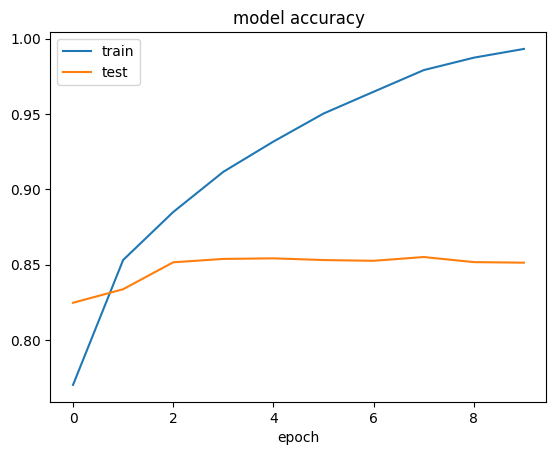

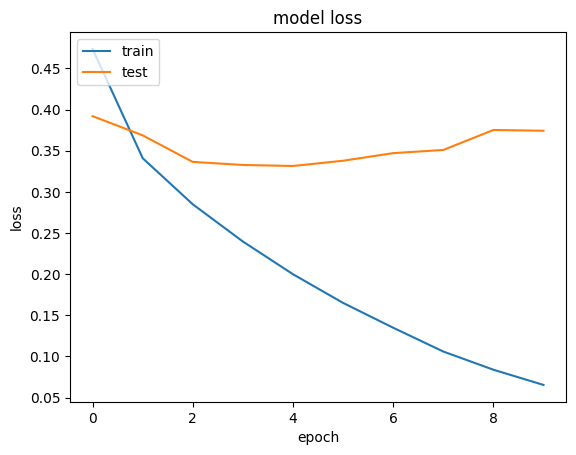

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

Finally, Let us Train with an LSTM Network

In [ ]:
# LSTM is an RNN and it is more suited to text and sequence data, thus, the expectation is that it will be better.
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights = [embedding_matrix], input_length = maxlength, trainable = False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Compiling the Model

lstm_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9356777 (35.69 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________
None


In [ ]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size = 128, epochs =10, verbose = 1, validation_split = 0.2)

Epoch 1/10
250/250 [==============================] - 6s 14ms/step - loss: 0.5027 - acc: 0.7551 - val_loss: 0.4120 - val_acc: 0.8151
Epoch 2/10
250/250 [==============================] - 2s 9ms/step - loss: 0.4101 - acc: 0.8180 - val_loss: 0.3875 - val_acc: 0.8261
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3688 - acc: 0.8399 - val_loss: 0.3570 - val_acc: 0.8472
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3393 - acc: 0.8550 - val_loss: 0.3350 - val_acc: 0.8606
Epoch 5/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3263 - acc: 0.8645 - val_loss: 0.3287 - val_acc: 0.8590
Epoch 6/10
250/250 [==============================] - 2s 9ms/step - loss: 0.3027 - acc: 0.8758 - val_loss: 0.3371 - val_acc: 0.8593
Epoch 7/10
250/250 [==============================] - 2s 9ms/step - loss: 0.2897 - acc: 0.8807 - val_loss: 0.3223 - val_acc: 0.8644
Epoch 8/10
250/250 [==============================] - 2s 9ms/step - loss: 0

In [ ]:
# Prediction on Test Set
score3 = lstm_model.evaluate(X_test, y_test, verbose = 1)
# Model Performance - Graphical View
# Model Performance
print("Test Score:", score3[0])
print("Test Accuracy:", score3[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3160 - acc: 0.8664
Test Score: 0.3159715235233307
Test Accuracy: 0.8664000034332275


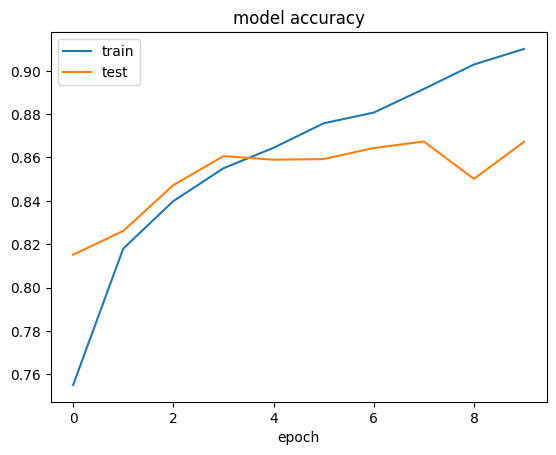

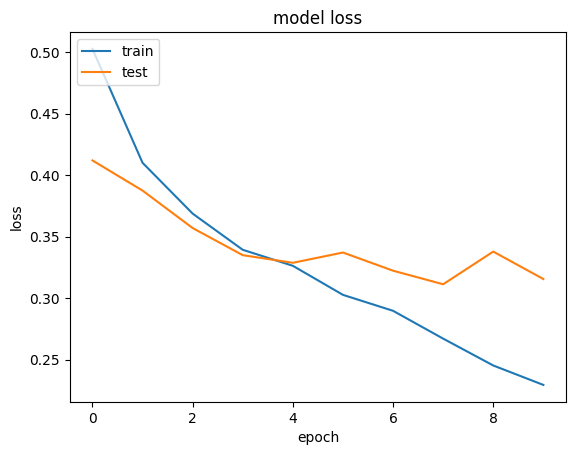

In [ ]:

import matplotlib.pyplot as plt
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
# Saving the Model as a h5 file for future use
lstm_model.save('mysentimentanalysismodel.h5', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Making Predictions on Live IMDb Data

Ensure the following list of files are in the working directory
The training Dataset
The glove pretrained dataset
The Unseen Reviews that we want to predict

In [ ]:
# Load previously trained LSTM Model
# From keras.models import load_model
# model_path = '/c2_lstm_model....
# Summarize model
# Pretrained_lstm_model_summary()


In [ ]:
# Load sample IMDb reviw csv, having 6 movie reviews, along with their IMDB rating
sample_reviews = pd.read_csv('/content/a3_IMDb_Unseen_Reviews.csv')
sample_reviews.head(10)

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10
5,5,Eternals,Worst MCU film ever\n\nFollowing the events of...,3


In [ ]:
len(sample_reviews['Review Text'])

6

In [ ]:
# Preprocess review text with earlier defined preprocess_text function

unseen_reviews = sample_reviews['Review Text']

unseen_processed = []
for review in unseen_reviews:
  review = preprocess_text(review)
  unseen_processed.append(review)

unseen_processed

['intelligent movie movie obviously allegorical fascinating tale ai mainly manipulation power wanting action spectacular cgi movie aimed people like think rather passively wait entertained themes ai also surveillance excellent points data us collected phone companies search engine companies commercial operating systems makers plot seems simple extremely clever protagonist playing games trying stay one step ahead one another movie perfectly consistent internal logic plays perfectly go expecting much however see people satisfied movie sets brilliantly therefore give least recent movies getting movie succeeds another recent movie ai transcendence think called failed interesting failure third movie ai spanish movie called eva also brilliant eva moving movie philosophical movies perfect different ways ai name movie ava seems nod title spanish movie aside nice stars appeared ex machina eva casting great course several aspects movie unrealistic often absurd allegorical movie acceptable movie 

In [ ]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = my_word_tokenizer.texts_to_sequences(unseen_processed)

# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=maxlength)
unseen_padded[5]

array([  133,     2,    42,   794,   565, 15155, 28863,  1915,  1448,
        1711,  2066,  1759,   447,   561,   840,  2801,    58,  3047,
        8281,  4115,  2066,  1949, 32617,     2,   116,   133,     2,
          27,  2371,  3603,   523, 23450,   350,  4973, 17597,    14,
           9,   838,    65,   301,   169,  5183,    26,    41,    97,
       13936,  1159,  2772,    14,     2,   219,  2230, 28863,  6241,
         100,  1370,    12,  4185,   659,  4089,   466, 12639,     5,
           1,    65,  1431,  5475,  3833,    43,    67,     5,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [ ]:
senten = sample_reviews.iloc[5]['Review Text']
senten

"Worst MCU film ever\n\nFollowing the events of Avengers: Endgame (2019), an unexpected tragedy forces the Eternals, ancient aliens who have been living on Earth in secret for thousands of years, out of the shadows to reunite against mankind's most ancient enemy, the Deviants.\n\nThis film is by far the worst MCU film I have watch. It's massive insuylt to the comics from the Jack Kirby days. Gender swapping some of the eternals, bad story telling which makes absolutely no sense, unlikeable characters, little to no action and ridicules changes to the MCU just sum up how bad this film. Completely ruined Endgame\n\nThe only goods were the music and the CGI for Arishen as well as bonus points for being voiced by David Kaye.\n\nOther then that it's just not a good movie makes both Captain Marvel and Iron Man 3 look good."

In [ ]:
total_word_count = len(senten)
total_word_count

818

In [ ]:
len(unseen_padded[5])

100

Now t Predict, We have to Give a Padded_Sequence to the Embedding Layer as its Input

In [ ]:
# So let us supply an unseen_padded sequence.

In [ ]:
# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = lstm_model.predict(unseen_padded)

unseen_sentiments

1/1 [==============================] - 1s 579ms/step


array([[0.9694445 ],
       [0.9951115 ],
       [0.2998999 ],
       [0.28182918],
       [0.98249555],
       [0.00936548]], dtype=float32)